<a href="https://colab.research.google.com/github/SujithSajeev-17/Machine_Learning/blob/main/Diabetes_prediction_Classifictaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Diabetes Dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

###**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay


###**Data Preprocessing and Visualisation**
- Loading Dataset
- Handling missing values
- Spliting the data into features and target variables.

In [2]:
#Loading dataset

df = pd.read_csv('/content/diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

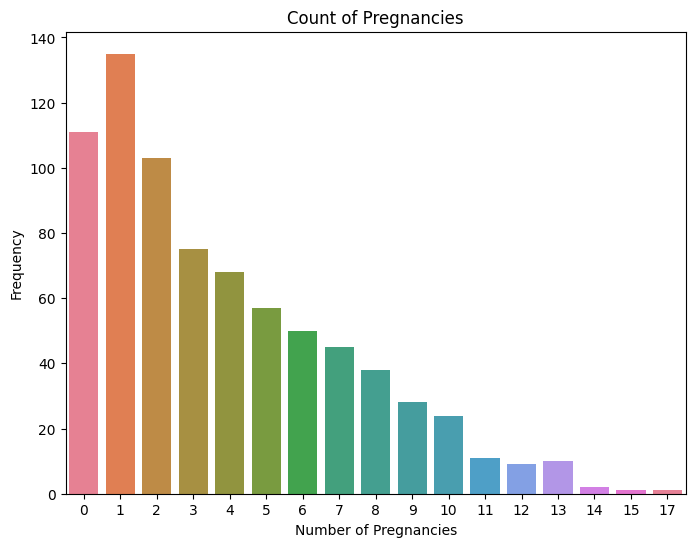

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pregnancies', data=df, palette='husl',legend=False,hue='Pregnancies')
plt.title('Count of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.show()

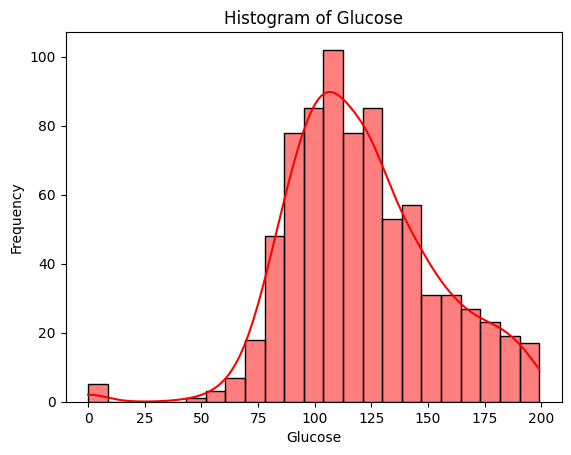

In [9]:
sns.histplot(x='Glucose',data=df,color='r',kde=True)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title("Histogram of Glucose")
plt.show()

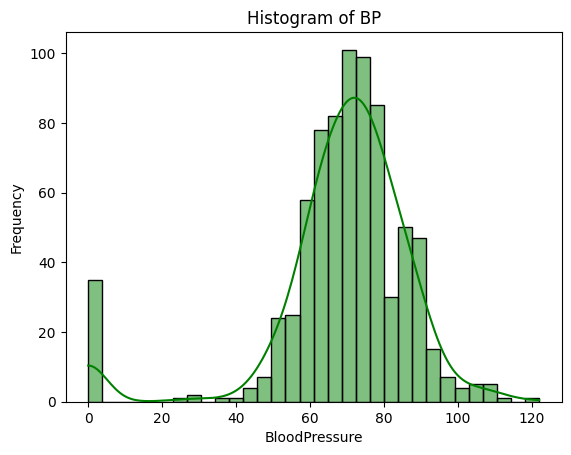

In [10]:
sns.histplot(x='BloodPressure',data=df,color='g',kde=True)
plt.title('Histogram of BP')
plt.ylabel('Frequency')
plt.show()

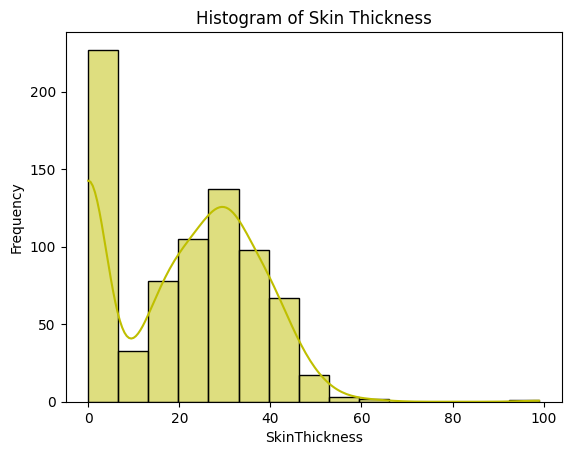

In [11]:
sns.histplot(x='SkinThickness',data=df,color='y',kde=True)
plt.title('Histogram of Skin Thickness')
plt.ylabel('Frequency')
plt.show()

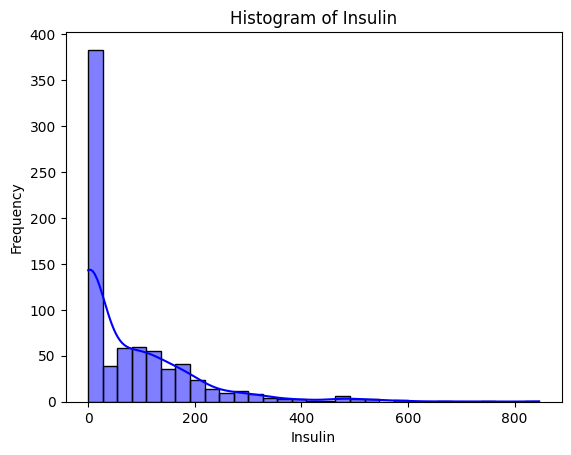

In [12]:
sns.histplot(x='Insulin',data=df,color='b',kde=True)
plt.title('Histogram of Insulin')
plt.ylabel('Frequency')
plt.show()

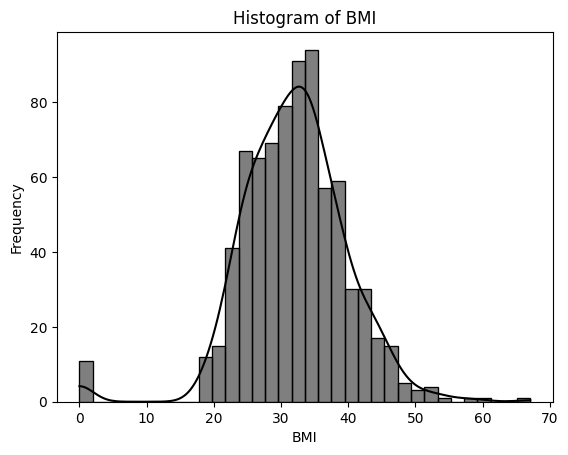

In [13]:
sns.histplot(x='BMI',data=df,color='k',kde=True)
plt.title('Histogram of BMI')
plt.ylabel('Frequency')
plt.show()

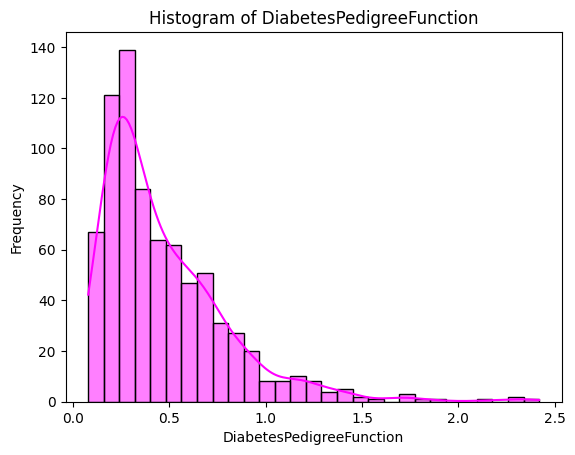

In [14]:
sns.histplot(x='DiabetesPedigreeFunction',data=df,color='magenta',kde=True)
plt.title('Histogram of DiabetesPedigreeFunction')
plt.ylabel('Frequency')
plt.show()

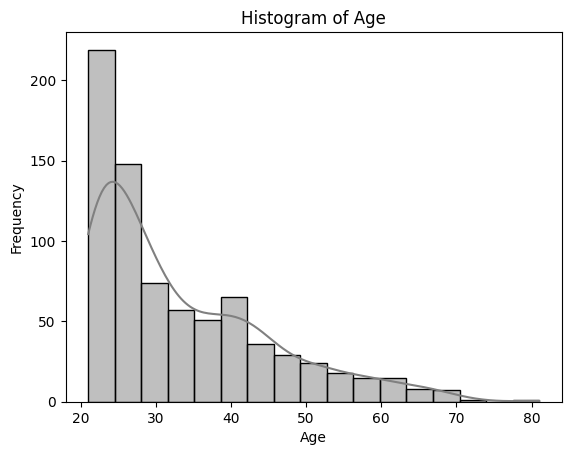

In [15]:
sns.histplot(x='Age',data=df,color='grey',kde=True)
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [16]:
#Correlation

correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


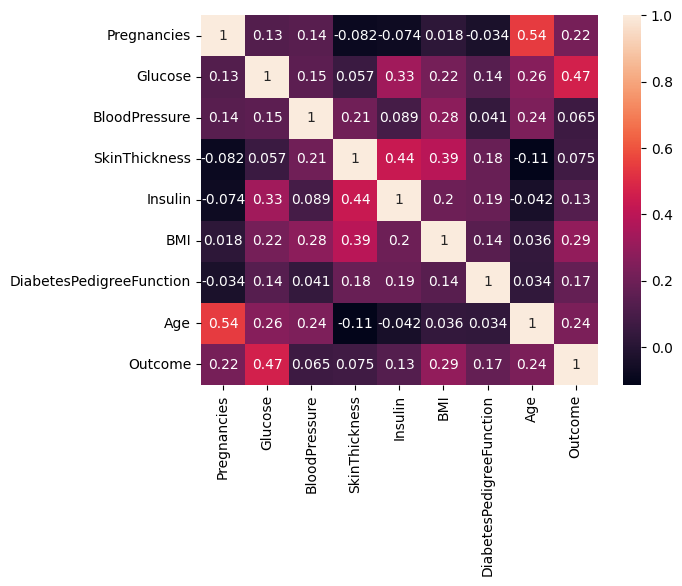

In [17]:
# Heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
# separating features and target variable.

x= df.iloc[:,:-1].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:
y = df.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

###**Train and Test data separation**

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [21]:
x_train

array([[1.50e+01, 1.36e+02, 7.00e+01, ..., 3.71e+01, 1.53e-01, 4.30e+01],
       [0.00e+00, 9.70e+01, 6.40e+01, ..., 3.68e+01, 6.00e-01, 2.50e+01],
       [1.00e+00, 1.16e+02, 7.00e+01, ..., 2.74e+01, 2.04e-01, 2.10e+01],
       ...,
       [1.30e+01, 1.26e+02, 9.00e+01, ..., 4.34e+01, 5.83e-01, 4.20e+01],
       [4.00e+00, 1.71e+02, 7.20e+01, ..., 4.36e+01, 4.79e-01, 2.60e+01],
       [9.00e+00, 1.02e+02, 7.60e+01, ..., 3.29e+01, 6.65e-01, 4.60e+01]])

In [22]:
x_test

array([[  7.   , 136.   ,  74.   , ...,  26.   ,   0.647,  51.   ],
       [  1.   , 151.   ,  60.   , ...,  26.1  ,   0.179,  22.   ],
       [  6.   , 109.   ,  60.   , ...,  25.   ,   0.206,  27.   ],
       ...,
       [  1.   ,  91.   ,  54.   , ...,  25.2  ,   0.234,  23.   ],
       [ 10.   , 168.   ,  74.   , ...,  38.   ,   0.537,  34.   ],
       [  9.   , 112.   ,  82.   , ...,  34.2  ,   0.26 ,  36.   ]])

In [23]:
y_train

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [24]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

###**Feature Scaling**

- Scaling the features to have a mean of 0 and a standard deviation of 1.

In [25]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###**Model Creation, Prediction and Performance Evaluation**

- Choosing a model
- training the model

####**K-Nearest Neighbors**
K-Nearest Neighbors (KNN) is a simple yet powerful algorithm used in machine learning for classification and regression tasks. It works on the principle of finding the K nearest data points in the feature space and making predictions based on the majority class or the average of the K nearest neighbors. KNN is particularly suitable for applications where the decision boundary is irregular or difficult to define mathematically. Its simplicity and effectiveness make it a popular choice for various predictive modeling tasks, including healthcare diagnostics like diabetes prediction. With proper tuning and feature engineering, KNN can provide accurate and reliable predictions, making it a valuable tool in the arsenal of machine learning practitioners.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [27]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
y_predict_knn = knn.predict(x_test)
y_predict_knn

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [29]:
cm_knn = confusion_matrix(y_test,y_predict_knn)
cm_knn

array([[128,  18],
       [ 30,  55]])

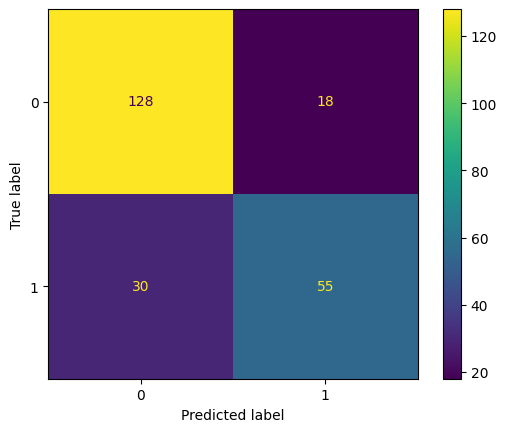

In [30]:
labels=["0",'1']
cmd_knn = ConfusionMatrixDisplay(cm_knn,display_labels=labels)
cmd_knn.plot()

In [31]:
acc_score_knn = accuracy_score(y_test,y_predict_knn) *100
print(f"Accuracy score: {acc_score_knn:.2f}")

Accuracy score: 79.22


In [32]:
report_df_knn = pd.DataFrame(classification_report(y_test,y_predict_knn,output_dict=True)).T
report_df_knn

,precision,recall,f1-score,support
0,0.810127,0.876712,0.842105,146.000000
1,0.753425,0.647059,0.696203,85.000000
accuracy,0.792208,0.792208,0.792208,0.792208
macro avg,0.781776,0.761886,0.769154,231.000000
weighted avg,0.789262,0.792208,0.788418,231.000000


####**Naive Bayes**

Naive Bayes, a powerful and efficient probabilistic classification method based on Bayes' Theorem, is widely used in machine learning for diverse applications such as text classification, medical diagnosis, and customer segmentation.Naive Bayes calculates the probability of a hypothesis given observed evidence, assuming feature independence. During training, it estimates class priors and conditional feature probabilities. For prediction, it computes posterior probabilities and selects the class with the highest probability.Despite its simplicity, Naive Bayes excels in various scenarios, offering a balance of effectiveness and efficiency in classification tasks.

**GaussianNB**

Gaussian Naive Bayes (NB) is a simple yet effective probabilistic classifier based on Bayes' theorem with the assumption of independence between features. It's particularly suited for classification tasks with continuous or real-valued features, assuming that each feature follows a Gaussian distribution. Despite its simplicity, Gaussian NB performs well in many practical applications and is computationally efficient.

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [34]:
nb.fit(x_train,y_train)

GaussianNB()

In [35]:
y_predict_nb = nb.predict(x_test)

In [36]:
cm_nb = confusion_matrix(y_test,y_predict_nb)
cm_nb

array([[128,  18],
       [ 32,  53]])

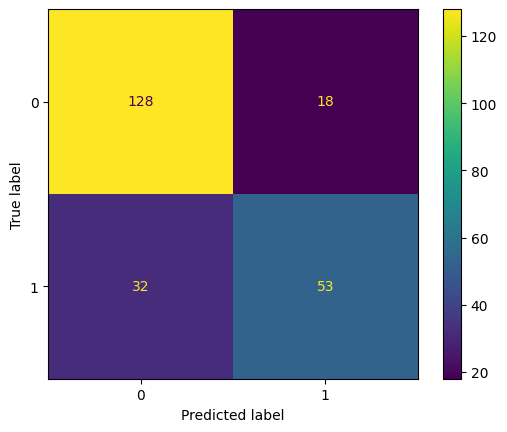

In [37]:
labels=["0",'1']
cmd_nb = ConfusionMatrixDisplay(cm_nb,display_labels=labels)
cmd_nb.plot()

In [38]:
acc_score_nb = accuracy_score(y_test,y_predict_nb) *100
print(f"Accuracy score: {acc_score_nb:.2f}")

Accuracy score: 78.35


In [39]:
report_df_nb = pd.DataFrame(classification_report(y_test,y_predict_nb,output_dict=True)).T
report_df_nb

,precision,recall,f1-score,support
0,0.800000,0.876712,0.836601,146.00000
1,0.746479,0.623529,0.679487,85.00000
accuracy,0.783550,0.783550,0.783550,0.78355
macro avg,0.773239,0.750121,0.758044,231.00000
weighted avg,0.780306,0.783550,0.778789,231.00000


####**Support Vector Machine**
Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates different classes in the feature space. SVM aims to maximize the margin between classes, making it robust to outliers and capable of handling high-dimensional data efficiently. With its versatility and effectiveness, SVM has become a popular choice in various domains, including image classification, text classification, and bioinformatics.

**Support Vector Classifier**

Support Vector Classifier (SVC) is a powerful supervised learning algorithm used for classification tasks. It works by finding the hyperplane that best separates different classes in the feature space while maximizing the margin between them. SVC is effective for handling both binary and multiclass classification problems and is known for its ability to handle high-dimensional data efficiently.

In [40]:
from sklearn.svm import SVC
svm = SVC()

In [41]:
svm.fit(x_train,y_train)

SVC()

In [42]:
y_predict_svm = svm.predict(x_test)

In [43]:
cm_svm = confusion_matrix(y_test,y_predict_svm)
cm_svm

array([[134,  12],
       [ 36,  49]])

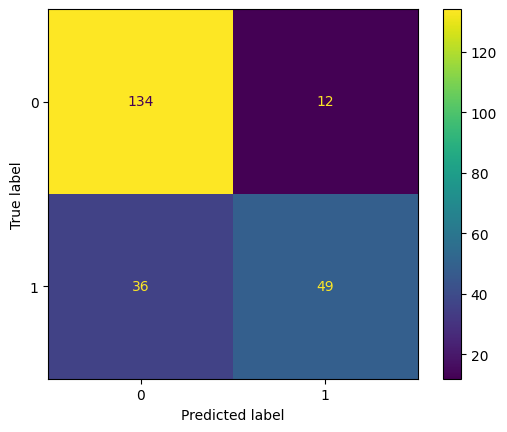

In [44]:
labels=["0",'1']
cmd_svm = ConfusionMatrixDisplay(cm_svm,display_labels=labels)
cmd_svm.plot()

In [45]:
acc_score_svm = accuracy_score(y_test,y_predict_svm) *100
print(f"Accuracy score: {acc_score_svm:.2f}")

Accuracy score: 79.22


In [46]:
report_df = pd.DataFrame(classification_report(y_test,y_predict_svm, output_dict=True)).T
report_df

,precision,recall,f1-score,support
0,0.788235,0.917808,0.848101,146.000000
1,0.803279,0.576471,0.671233,85.000000
accuracy,0.792208,0.792208,0.792208,0.792208
macro avg,0.795757,0.747139,0.759667,231.000000
weighted avg,0.793771,0.792208,0.783020,231.000000


####**Decision Tree**
A Decision Tree algorithm is a simple yet powerful tool in machine learning for classification and regression tasks. It recursively splits the dataset based on attributes to make decisions. While easy to interpret, Decision Trees can overfit and may require techniques like pruning or ensemble methods for better performance. They find applications in various fields such as healthcare diagnosis, credit risk assessment, fraud detection, and customer churn prediction.

**Decison Tree Classifier**

Decision Tree classifiers are versatile tools for decision-making in machine learning. They segment data into subsets based on attributes, enabling straightforward interpretation. Despite their simplicity, they're prone to overfitting and are utilized in various domains like healthcare, finance, and marketing for tasks such as diagnosis, risk assessment, and customer segmentation.




In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [48]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
y_predict_dt= dt.predict(x_test)

In [50]:
cm_dt = confusion_matrix(y_test,y_predict_dt)
cm_dt

array([[121,  25],
       [ 42,  43]])

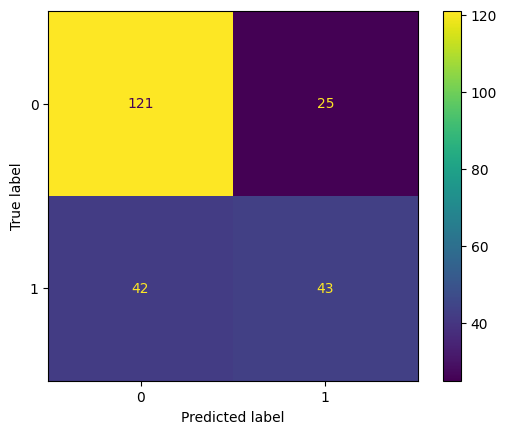

In [51]:
labels=["0",'1']
cmd_dt = ConfusionMatrixDisplay(cm_dt,display_labels=labels)
cmd_dt.plot()

In [52]:
acc_score_dt = accuracy_score(y_test,y_predict_dt) *100
print(f"Accuracy score: {acc_score_dt:.2f}")

Accuracy score: 71.00


In [53]:
report_df_dt = pd.DataFrame(classification_report(y_test,y_predict_dt,output_dict=True)).T
report_df_dt

,precision,recall,f1-score,support
0,0.742331,0.828767,0.783172,146.000000
1,0.632353,0.505882,0.562092,85.000000
accuracy,0.709957,0.709957,0.709957,0.709957
macro avg,0.687342,0.667325,0.672632,231.000000
weighted avg,0.701863,0.709957,0.701822,231.000000


####**Random Forest**

Random Forest is a popular ensemble learning technique that combines multiple decision trees to improve predictive accuracy and reduce overfitting. It constructs a multitude of decision trees during training and outputs the mode of the classes (for classification) or the average prediction (for regression) of the individual trees. Random Forests are widely used due to their robustness, scalability, and effectiveness across various domains such as finance, healthcare, and recommendation systems.

**The Random Forest Classifier**

The Random Forest Classifier is an ensemble learning method based on decision trees. It constructs a multitude of decision trees during training and outputs the mode of the classes for classification tasks. It's highly effective in handling complex datasets, reducing overfitting, and providing robust predictions. Random Forest classifiers find applications in various fields such as image classification, fraud detection, and bioinformatics.

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [55]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_predict_rf =rf.predict(x_test)

In [57]:
cm_rf = confusion_matrix(y_test,y_predict_rf)
cm_rf

array([[132,  14],
       [ 29,  56]])

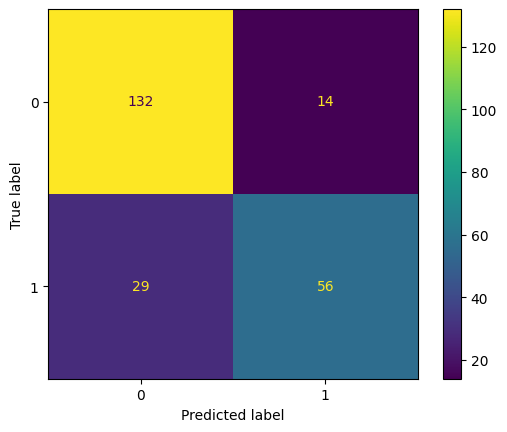

In [58]:
labels=["0",'1']
cmd_rf = ConfusionMatrixDisplay(cm_rf,display_labels=labels)
cmd_rf.plot()

In [59]:
acc_score_rf = accuracy_score(y_test, y_predict_rf) * 100
print(f"Accuracy score: {acc_score_rf:.2f}")


Accuracy score: 81.39


In [60]:
report_df_rf = pd.DataFrame(classification_report(y_test,y_predict_rf,output_dict=True)).T
report_df_rf

,precision,recall,f1-score,support
0,0.819876,0.904110,0.859935,146.000000
1,0.800000,0.658824,0.722581,85.000000
accuracy,0.813853,0.813853,0.813853,0.813853
macro avg,0.809938,0.781467,0.791258,231.000000
weighted avg,0.812562,0.813853,0.809393,231.000000


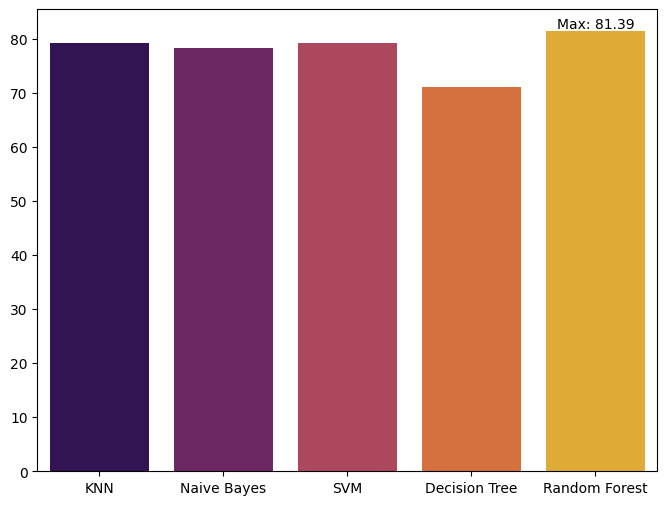

In [61]:
acc_score= [acc_score_knn,acc_score_nb,acc_score_svm,acc_score_dt,acc_score_rf]
acc_score_max= max(acc_score)
max_index = acc_score.index(acc_score_max)
models =['KNN','Naive Bayes','SVM','Decision Tree','Random Forest']

plt.figure(figsize=(8,6))
sns.barplot(x=models,y=acc_score,palette='inferno',hue=models)
plt.text(max_index, acc_score_max, f'Max: {acc_score_max:.2f}', ha='center', va='bottom')
plt.show()

Random Forest exhibited the highest level of accuracy, reaching 81.39%.
